In [ ]:
import sys; import os; sys.path.insert(0, os.path.abspath('..'))
from libraries import lib
from libraries.NeuralStates import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

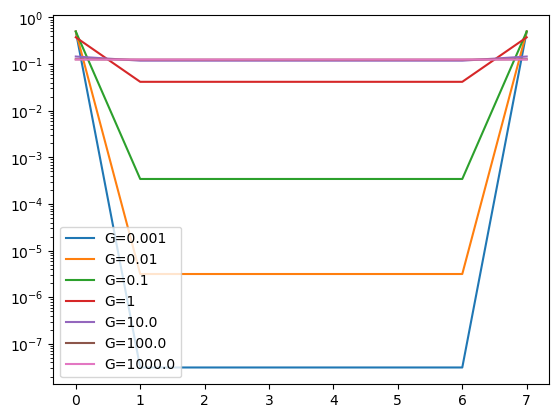

In [3]:
N = 3
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

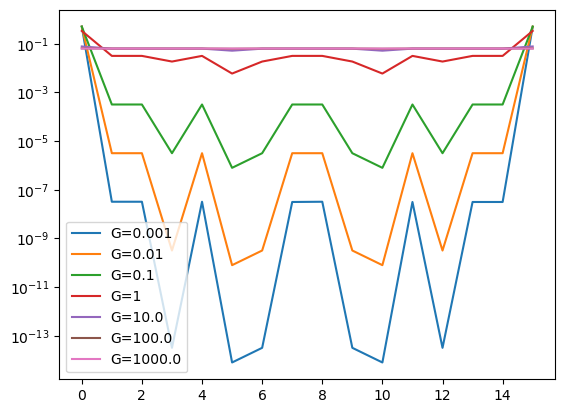

In [4]:
N = 4
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

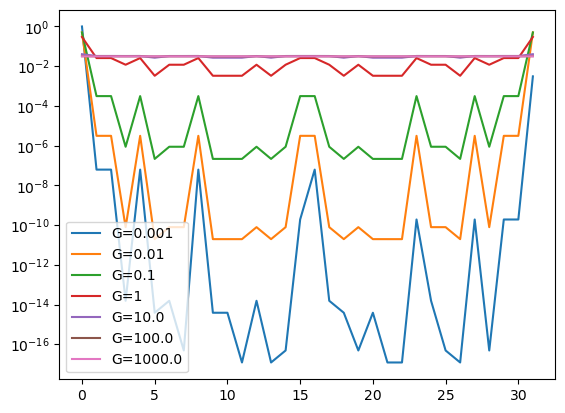

In [5]:
N = 5
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

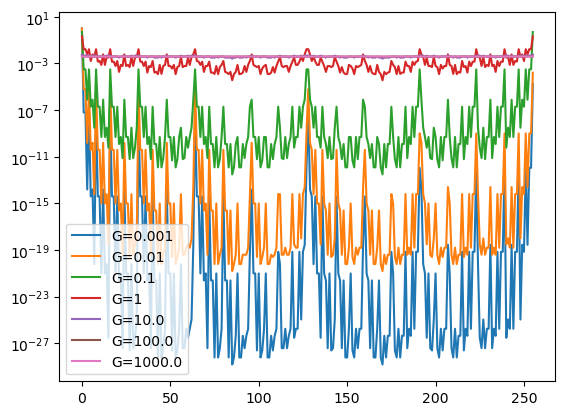

In [6]:
N = 8
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

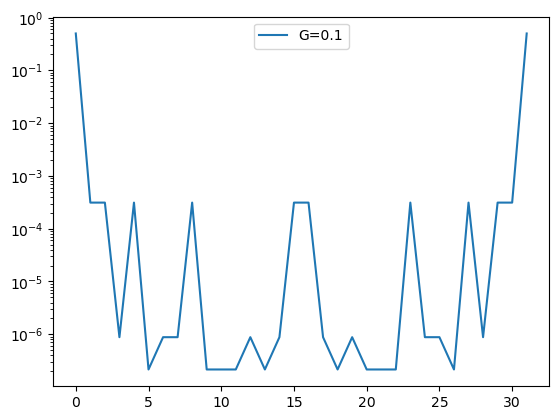

In [7]:
N = 5
J = 1
Gamma = 0.1
h = lib.TFIM_hamiltonian(N, J, Gamma)
gs = h.eigenstates()[1][0]
gs = np.squeeze(gs.full())
states = [n for n in range(2 ** N)]
distr = np.abs(gs) ** 2
plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

In [8]:
def calc_bitdist(a, b, N):
    diffs = a ^ b
    return sum((diffs >> i) & 1 for i in range(N))

In [9]:
calc_bitdist(0, 2 ** N - 1, N)

5

In [10]:
diffs = []
vec_diffs = []
prob_diffs = []
for i in range(0, 2 ** N):
    for j in range(i + 1, 2 ** N):
        diffs.append(calc_bitdist(i, j, N))
        vec_diffs.append(abs(gs[i] - gs[j]))
        prob_diffs.append(abs(distr[i] - distr[j]))

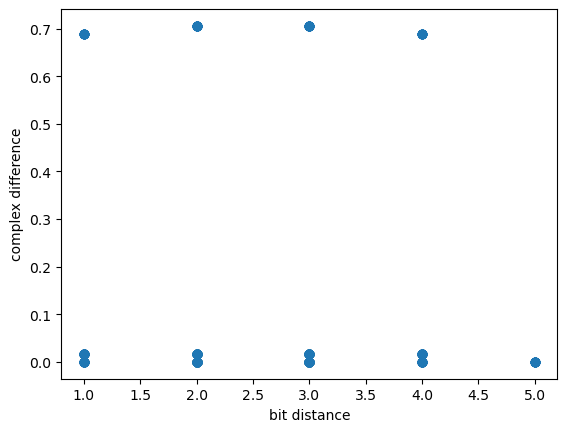

In [11]:
plt.scatter(diffs, vec_diffs)
plt.xlabel('bit distance')
plt.ylabel('complex difference')
plt.show()

In [12]:
res = stats.linregress(diffs, vec_diffs)
print(res.rvalue)

-0.03144803972814214


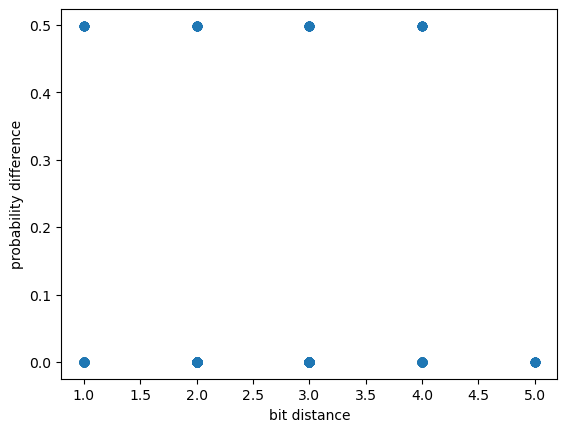

In [13]:
plt.scatter(diffs, prob_diffs)
plt.xlabel('bit distance')
plt.ylabel('probability difference')
plt.show()

In [14]:
res = stats.linregress(diffs, prob_diffs)
print(res.rvalue)

-0.028826049710284612


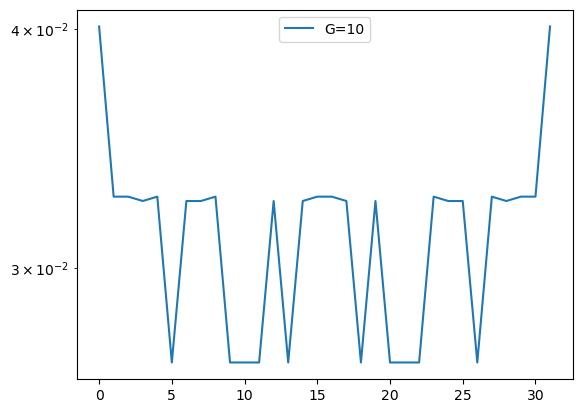

In [15]:
N = 5
J = 1
Gamma = 10
h = lib.TFIM_hamiltonian(N, J, Gamma)
gs = h.eigenstates()[1][0]
gs = np.squeeze(gs.full())
states = [n for n in range(2 ** N)]
distr = np.abs(gs) ** 2
plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

In [16]:
diffs = []
vec_diffs = []
prob_diffs = []
for i in range(0, 2 ** N):
    for j in range(i + 1, 2 ** N):
        diffs.append(calc_bitdist(i, j, N))
        vec_diffs.append(abs(gs[i] - gs[j]))
        prob_diffs.append(abs(distr[i] - distr[j]))

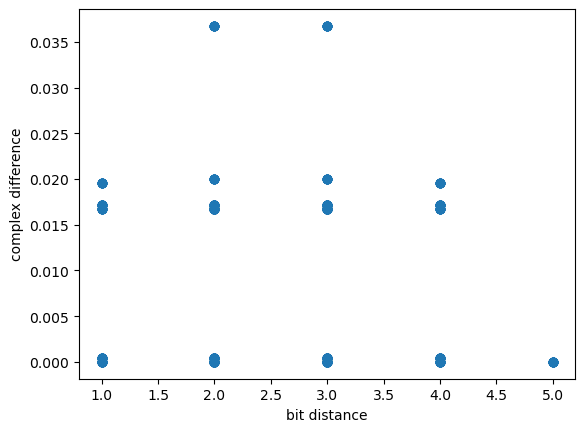

In [17]:
plt.scatter(diffs, vec_diffs)
plt.xlabel('bit distance')
plt.ylabel('complex difference')
plt.show()

In [18]:
res = stats.linregress(diffs, vec_diffs)
print(res.rvalue)

-0.07691784844485236


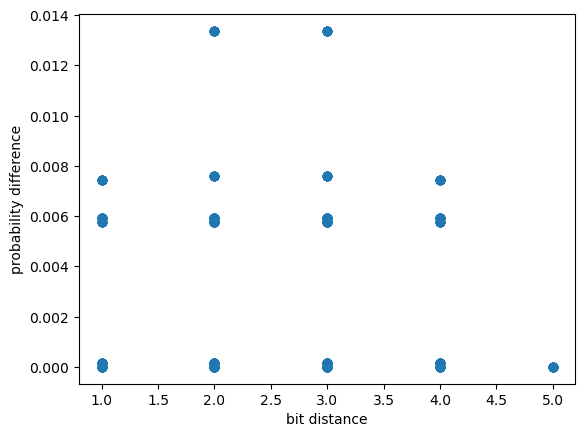

In [19]:
plt.scatter(diffs, prob_diffs)
plt.xlabel('bit distance')
plt.ylabel('probability difference')
plt.show()

In [20]:
res = stats.linregress(diffs, prob_diffs)
print(res.rvalue)

-0.07589923981179475


In [21]:
ns = [n for n in range(2, 11)]
gses = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 1)
    gses.append(h.eigenstates()[0][0])

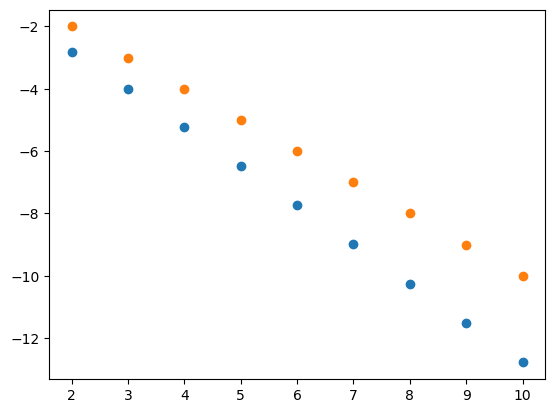

In [22]:
plt.scatter(ns, gses, label = 'actual')
plt.scatter(ns, -1 * np.array(ns), label = 'y=x')
plt.show()

In [23]:
res = stats.linregress(ns, gses)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-1.2490857082444276), intercept=np.float64(-0.26062454660968903), rvalue=np.float64(-0.9999498573473531), pvalue=np.float64(2.939283269340342e-15), stderr=np.float64(0.004728008000195823), intercept_stderr=np.float64(0.0308832189340706))
0.9998997172089918


In [24]:
print(10 ** 0.5, 10 ** -0.5)

3.1622776601683795 0.31622776601683794


In [25]:
ns = [n for n in range(2, 11)]
gses_large = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 3.16)
    gses_large.append(h.eigenstates()[0][0])

In [26]:
res = stats.linregress(ns, gses_large)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-3.2274909713051994), intercept=np.float64(-0.09488156342746024), rvalue=np.float64(-0.9999915452521397), pvalue=np.float64(5.78609803784559e-18), stderr=np.float64(0.0050163068887105824), intercept_stderr=np.float64(0.032766379388131116))
0.9999830905757622


In [27]:
ns = [n for n in range(2, 11)]
gses_small = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 0.316)
    gses_small.append(h.eigenstates()[0][0])

In [28]:
res = stats.linregress(ns, gses_small)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-1.02129651713657), intercept=np.float64(-0.029933726574262742), rvalue=np.float64(-0.999991585927859), pvalue=np.float64(5.6892537294669476e-18), stderr=np.float64(0.0015835204815038918), intercept_stderr=np.float64(0.010343512471815633))
0.9999831719265145


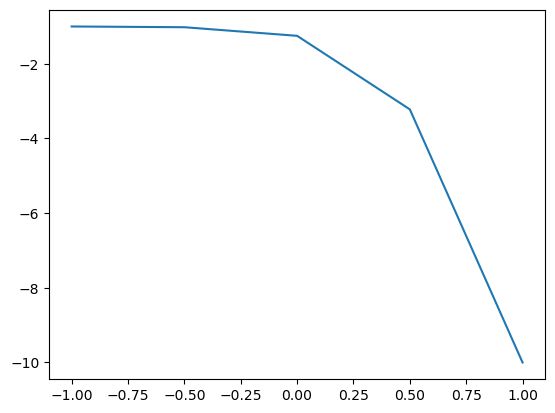

In [29]:
plt.plot([-1, -0.5, 0, 0.5, 1], [-1, -1.02, -1.25, -3.22, -10]) 
# Gamma = 10^-x, y=slope of scaling wrt n for said Gamma 
plt.show()

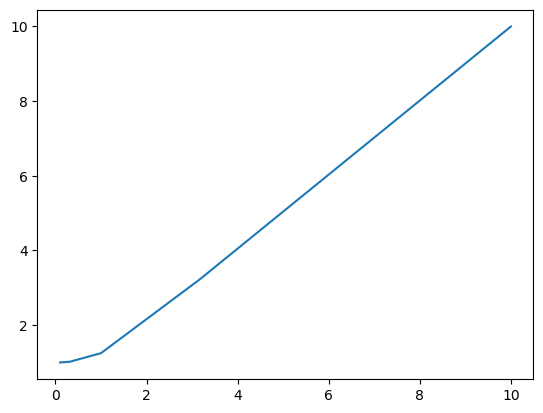

In [30]:
x = np.array([-1, -0.5, 0, 0.5, 1])
y = np.array([-1, -1.02, -1.25, -3.22, -10])
plt.plot(10** x, (-1 * y)) 
# Gamma = 10^-x, y=slope of scaling wrt n for said Gamma 
plt.show()

In [31]:
res = stats.linregress(10 ** x, -y)
res

LinregressResult(slope=np.float64(0.9296207201238365), intercept=np.float64(0.5875038574760887), rvalue=np.float64(0.997474835323444), pvalue=np.float64(0.00015226631856866393), stderr=np.float64(0.03821454832686832), intercept_stderr=np.float64(0.1801442076849369))

In [2]:
log_gammas = np.linspace(-2, 2, 21)
ns = [n for n in range(2, 10)]
slopes = []
for lg in log_gammas:
    print(lg)
    data = []
    for n in ns:
        h = lib.TFIM_hamiltonian(n, 1, 10 ** lg)
        data.append(h.eigenstates()[0][0])
    res = stats.linregress(ns, data)
    slopes.append(res.slope)

-2.0
-1.8
-1.6
-1.4
-1.2
-1.0
-0.7999999999999998
-0.5999999999999999
-0.3999999999999999
-0.19999999999999996
0.0
0.20000000000000018
0.40000000000000036
0.6000000000000001
0.8000000000000003
1.0
1.2000000000000002
1.4000000000000004
1.6
1.8000000000000003
2.0


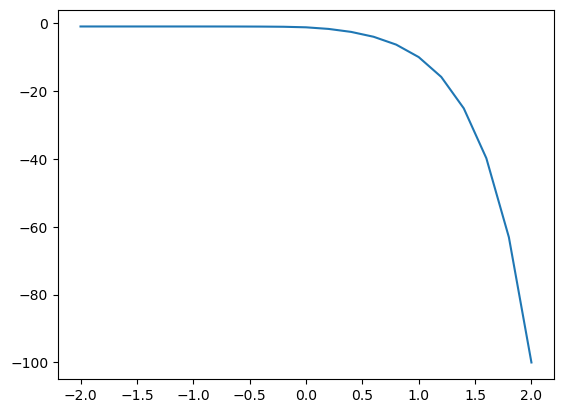

In [3]:
plt.plot(log_gammas, slopes)
plt.show()

In [4]:
log_gammas = np.array(log_gammas)
slopes = np.array(slopes)

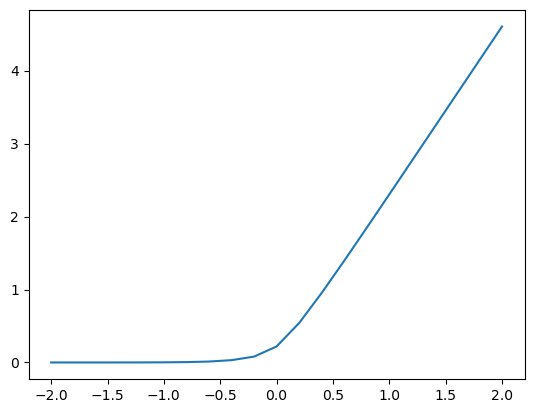

In [5]:
plt.plot(log_gammas, np.log(-1 * slopes))
plt.show()

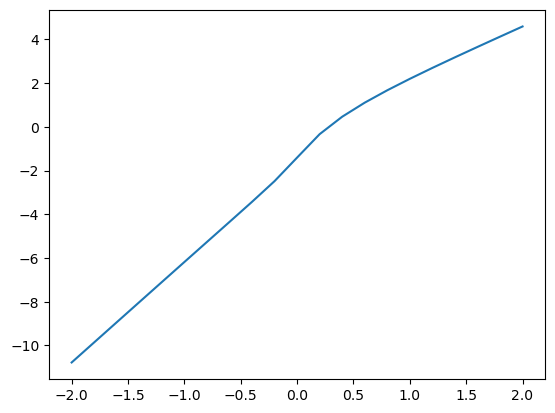

In [6]:
plt.plot(log_gammas, np.log(-1 * slopes - 1))
plt.show()

In [7]:
log_gammas[:len(log_gammas)//2]

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2])

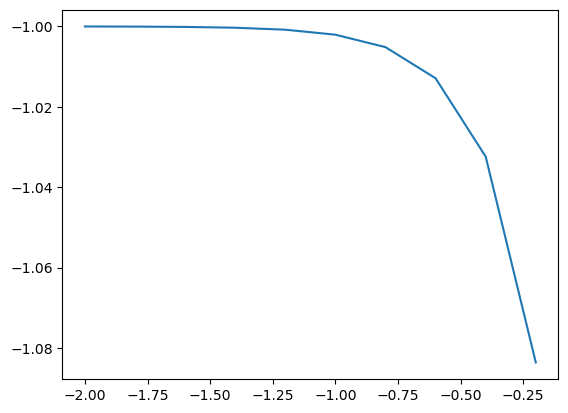

In [8]:
half = len(log_gammas) // 2
plt.plot(log_gammas[:half], slopes[:half])
plt.show()

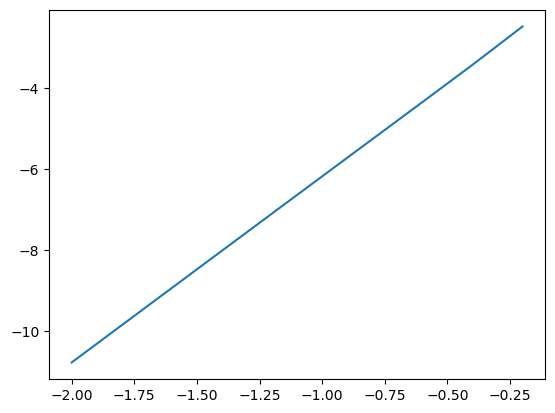

In [10]:
half = len(log_gammas) // 2
plt.plot(log_gammas[:half], np.log(-1 * slopes[:half] - 1))
plt.show()

In [12]:
res = stats.linregress(log_gammas[:half], np.log(-1 * slopes[:half] - 1))
res

LinregressResult(slope=np.float64(4.6007784744138105), intercept=np.float64(-1.5801644323633095), rvalue=np.float64(0.999995983856202), pvalue=np.float64(1.1381853245158742e-21), stderr=np.float64(0.004610067266373785), intercept_stderr=np.float64(0.005720943026176386))

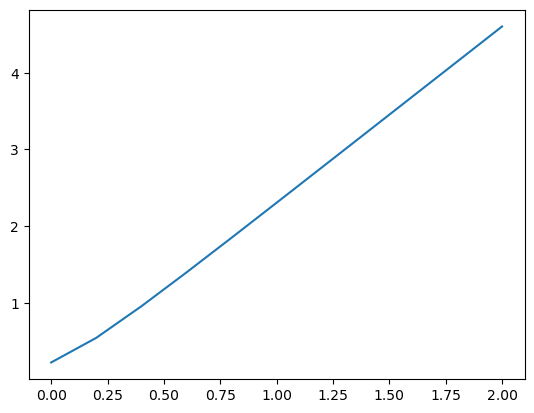

In [13]:
half = len(log_gammas) // 2
plt.plot(log_gammas[half:], np.log(-1 * slopes[half:]))
plt.show()

In [14]:
res = stats.linregress(log_gammas[half:], np.log(-1 * slopes[half:]))
res

LinregressResult(slope=np.float64(2.232438939670206), intercept=np.float64(0.10224923061661295), rvalue=np.float64(0.9994788733436177), pvalue=np.float64(9.847709608034751e-15), stderr=np.float64(0.024033375389698654), intercept_stderr=np.float64(0.02843667325252802))

In [16]:
res = stats.linregress(log_gammas[half + 1:], np.log(-1 * slopes[half + 1:]))
res

LinregressResult(slope=np.float64(2.2715360798648243), intercept=np.float64(0.047513234344147115), rvalue=np.float64(0.9999208512861982), pvalue=np.float64(1.7167705526100814e-16), stderr=np.float64(0.010105024158045204), intercept_stderr=np.float64(0.012540005198619452))

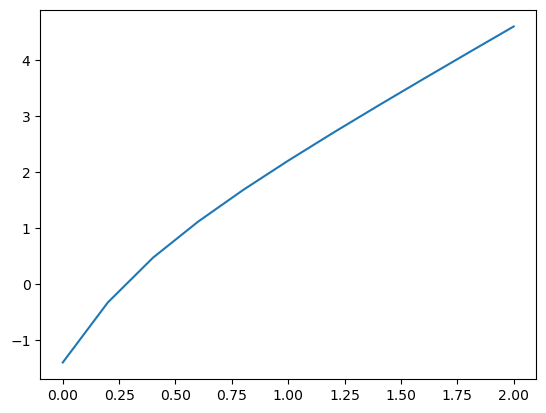

In [15]:
half = len(log_gammas) // 2
plt.plot(log_gammas[half:], np.log(-1 * slopes[half:] - 1))
plt.show()

In [17]:
res = stats.linregress(log_gammas[half:], np.log(-1 * slopes[half:] - 1))
res

LinregressResult(slope=np.float64(2.845064604116952), intercept=np.float64(-0.8470076597238618), rvalue=np.float64(0.9915155850690315), pvalue=np.float64(2.7601253667927705e-09), stderr=np.float64(0.12432948574554202), intercept_stderr=np.float64(0.14710863141247463))

In [18]:
res = stats.linregress(log_gammas[half + 1:], np.log(-1 * slopes[half + 1:] - 1))
res

LinregressResult(slope=np.float64(2.6592537937383933), intercept=np.float64(-0.58687252519388), rvalue=np.float64(0.9966659494922356), pvalue=np.float64(5.384286262332573e-10), stderr=np.float64(0.07696689490851535), intercept_stderr=np.float64(0.0955134047359951))